# **Facial Emotion Detection**


## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**<br>
**‘sad’**<br>
**‘surprise’**<br>
**‘neutral’**<br>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import random

import zipfile
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image_dataset_from_directory

# To create an ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, LeakyReLU, MaxPooling2D

# To create a checkpoint and save the best model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# To load the model
from tensorflow.keras.models import load_model

from tensorflow.keras.optimizers.legacy import Adam

# To evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [90]:
def plot_epoch(history):
  plt.figure(figsize=(12, 6))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

In [3]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Facial_Emotes/Facial_emotion_images.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()






In [ ]:
directory_path = "/tmp/Facial_emotion_images/train/sad"
print("amount of sad images in train: " + str(len(os.listdir(directory_path))))
directory_path = "/tmp/Facial_emotion_images/validation/sad"
print("amount of sad images in validation: " + str(len(os.listdir(directory_path))))

directory_path = "/tmp/Facial_emotion_images/train/happy"
print("amount of happy images in train: " + str(len(os.listdir(directory_path))))
directory_path = "/tmp/Facial_emotion_images/validation/happy"
print("amount of happy images in validation: " + str(len(os.listdir(directory_path))))

directory_path = "/tmp/Facial_emotion_images/train/neutral"
print("amount of neutral images in train: " + str(len(os.listdir(directory_path))))
directory_path = "/tmp/Facial_emotion_images/validation/neutral"
print("amount of neutral images in validation: " + str(len(os.listdir(directory_path))))

directory_path = "/tmp/Facial_emotion_images/train/surprise"
print("amount of surprised images in train: " + str(len(os.listdir(directory_path))))
directory_path = "/tmp/Facial_emotion_images/validation/surprise"
print("amount of surprised images in validation: " + str(len(os.listdir(directory_path))))

amount of sad images in train: 3982
amount of sad images in validation: 1139
amount of happy images in train: 3976
amount of happy images in validation: 1825
amount of neutral images in train: 3978
amount of neutral images in validation: 1216
amount of surprised images in train: 3173
amount of surprised images in validation: 797


In [82]:
train_dir = "/tmp/Facial_emotion_images/train"

batch_size = 32
image_size = (48, 48)

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  color_mode = "grayscale",
  label_mode='categorical',
  image_size=image_size,
  batch_size=batch_size)

val_dir = "/tmp/Facial_emotion_images/validation"

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  color_mode = "grayscale",
  label_mode='categorical',
  image_size=image_size,
  batch_size=batch_size)

test_dir = "/tmp/Facial_emotion_images/test"

test_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  color_mode = "grayscale",
  label_mode='categorical',
  image_size=image_size,
  batch_size=batch_size)

print(train_ds.class_names)

Found 15109 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.
['happy', 'neutral', 'sad', 'surprise']


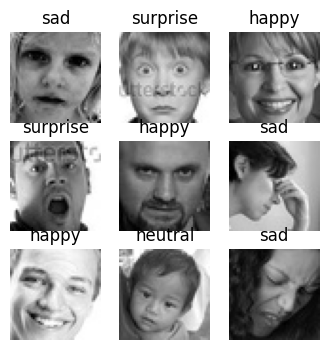

In [17]:
plt.figure(figsize=(4, 4))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [18]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(0)

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [48]:
num_samples = 15109
steps_per_epoch = 23

num_val_samples = 4977
val_steps = 24

num_classes = 4

def cnn_model_gray_1():
    model = Sequential()

    model.add(tf.keras.layers.Rescaling(1./255))

    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(256, 256, 3)))

    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))

    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(alpha=0.1))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model_rgb_1 = cnn_model_gray_1()

In [ ]:
!cat /usr/include/cudnn.h | grep CUDNN_MAJOR -A 2

### **Compiling and Training the Model**

In [47]:
print('Number of images:', len(train_ds.file_paths))

Number of images: 15109


In [49]:
#Adding earlystop callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10)



history_rgb_1 = model_rgb_1.fit(
    train_ds,
    validation_data = val_ds,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
23/23 [==============================] - 1s 25ms/step - loss: 1.4044 - accuracy: 0.2826 - val_loss: 1.3865 - val_accuracy: 0.2843
Epoch 2/20
23/23 [==============================] - 0s 19ms/step - loss: 1.3650 - accuracy: 0.3315 - val_loss: 1.3152 - val_accuracy: 0.3783
Epoch 3/20
23/23 [==============================] - 0s 19ms/step - loss: 1.2953 - accuracy: 0.4185 - val_loss: 1.2476 - val_accuracy: 0.4213
Epoch 4/20
23/23 [==============================] - 0s 19ms/step - loss: 1.2524 - accuracy: 0.4253 - val_loss: 1.1887 - val_accuracy: 0.4465
Epoch 5/20
23/23 [==============================] - 0s 19ms/step - loss: 1.2268 - accuracy: 0.4280 - val_loss: 1.1793 - val_accuracy: 0.4483
Epoch 6/20
23/23 [==============================] - 0s 19ms/step - loss: 1.1527 - accuracy: 0.4783 - val_loss: 1.1064 - val_accuracy: 0.5242
Epoch 7/20
23/23 [==============================] - 0s 20ms/step - loss: 1.1090 - accuracy: 0.5489 - val_loss: 1.0910 - val_accuracy: 0.5230
Epoch 8/20
23

### **Evaluating the Model on the Test Set**

In [69]:
pred_rgb_1 = model_rgb_1.predict(test_ds)

156/156 [==============================] - 0s 2ms/step


In [70]:
pred_rgb_1 = [np.argmax(i) for i in pred_rgb_1]
print(pred_rgb_1)

[3, 0, 2, 3, 0, 1, 2, 3, 0, 0, 0, 3, 0, 2, 0, 2, 3, 1, 1, 0, 3, 0, 2, 0, 1, 3, 2, 1, 2, 2, 0, 0, 0, 3, 1, 0, 2, 0, 3, 3, 1, 2, 1, 3, 0, 3, 3, 0, 0, 2, 1, 0, 2, 0, 3, 1, 2, 1, 3, 2, 0, 0, 2, 2, 0, 3, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 3, 2, 0, 3, 2, 1, 3, 3, 3, 0, 2, 2, 3, 1, 2, 1, 3, 3, 1, 0, 0, 3, 1, 0, 3, 0, 0, 3, 0, 3, 2, 3, 1, 0, 3, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 3, 0, 2, 3, 3, 2, 1, 0, 2, 3, 0, 2, 0, 0, 3, 2, 0, 0, 3, 0, 2, 0, 3, 3, 1, 3, 1, 3, 0, 2, 3, 0, 1, 3, 2, 1, 0, 3, 2, 0, 0, 2, 2, 3, 1, 3, 1, 3, 3, 1, 0, 0, 3, 3, 3, 3, 0, 3, 3, 2, 2, 2, 2, 0, 3, 0, 3, 0, 0, 3, 0, 2, 1, 0, 1, 3, 0, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 1, 1, 0, 1, 0, 1, 0, 3, 1, 2, 1, 1, 2, 1, 1, 2, 3, 0, 1, 0, 1, 3, 2, 0, 2, 3, 0, 2, 3, 1, 3, 0, 1, 3, 2, 0, 0, 0, 3, 2, 2, 2, 0, 3, 3, 2, 3, 0, 0, 3, 1, 1, 0, 2, 3, 2, 3, 0, 3, 0, 3, 2, 2, 3, 3, 3, 0, 3, 0, 0, 3, 3, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 3, 2, 0, 3, 1, 2, 0, 2, 0, 3, 2, 0, 2, 3, 3, 3, 3, 0, 3, 0, 3, 3, 1, 2, 1, 2, 3, 1, 0, 2, 1, 

In [71]:
y_true = np.concatenate([y for x, y in test_ds])
y_true = np.argmax(y_true, axis=1)

print(y_true)

[2 0 0 ... 3 1 3]


In [72]:

print(classification_report(y_true, pred_rgb_1))

              precision    recall  f1-score   support

           0       0.37      0.29      0.32      1825
           1       0.25      0.20      0.22      1216
           2       0.22      0.23      0.23      1139
           3       0.15      0.25      0.18       797

    accuracy                           0.25      4977
   macro avg       0.25      0.24      0.24      4977
weighted avg       0.27      0.25      0.25      4977



In [73]:
tf.keras.backend.clear_session()

np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

In [85]:

def cnn_model_rgb_2():
    model = Sequential()

    model.add(tf.keras.layers.Rescaling(1./255))

    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(48, 48, 1)))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Dropout(0.5))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


model_rgb_2 = cnn_model_rgb_2()


### **Compiling and Training the Model**

In [87]:
#Adding earlystop callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10)

history_rgb_2 = model_rgb_2.fit(
    train_ds,
    validation_data = val_ds,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
23/23 [==============================] - 1s 21ms/step - loss: 1.2244 - accuracy: 0.4674 - val_loss: 1.2222 - val_accuracy: 0.4278
Epoch 2/20
23/23 [==============================] - 0s 22ms/step - loss: 1.2418 - accuracy: 0.4755 - val_loss: 1.3920 - val_accuracy: 0.3181
Epoch 3/20
23/23 [==============================] - 0s 21ms/step - loss: 1.2024 - accuracy: 0.4946 - val_loss: 1.3871 - val_accuracy: 0.4089
Epoch 4/20
23/23 [==============================] - 0s 21ms/step - loss: 1.2216 - accuracy: 0.4701 - val_loss: 1.8103 - val_accuracy: 0.3707
Epoch 5/20
23/23 [==============================] - 0s 21ms/step - loss: 1.2116 - accuracy: 0.4701 - val_loss: 1.2618 - val_accuracy: 0.4000
Epoch 6/20
23/23 [==============================] - 0s 21ms/step - loss: 1.2047 - accuracy: 0.4715 - val_loss: 1.2041 - val_accuracy: 0.4858
Epoch 7/20
23/23 [==============================] - 0s 21ms/step - loss: 1.1326 - accuracy: 0.5272 - val_loss: 1.1799 - val_accuracy: 0.4467
Epoch 8/20
23

In [88]:
pred_rgb_2 = model_rgb_2.predict(test_ds)
pred_rgb_2 = [np.argmax(i) for i in pred_rgb_2]

y_true = np.concatenate([y for x, y in test_ds])
y_true = np.argmax(y_true, axis=1)

print(classification_report(y_true, pred_rgb_2))


156/156 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.36      0.42      0.38      1825
           1       0.23      0.26      0.24      1216
           2       0.23      0.07      0.11      1139
           3       0.15      0.20      0.17       797

    accuracy                           0.27      4977
   macro avg       0.24      0.24      0.23      4977
weighted avg       0.26      0.27      0.25      4977



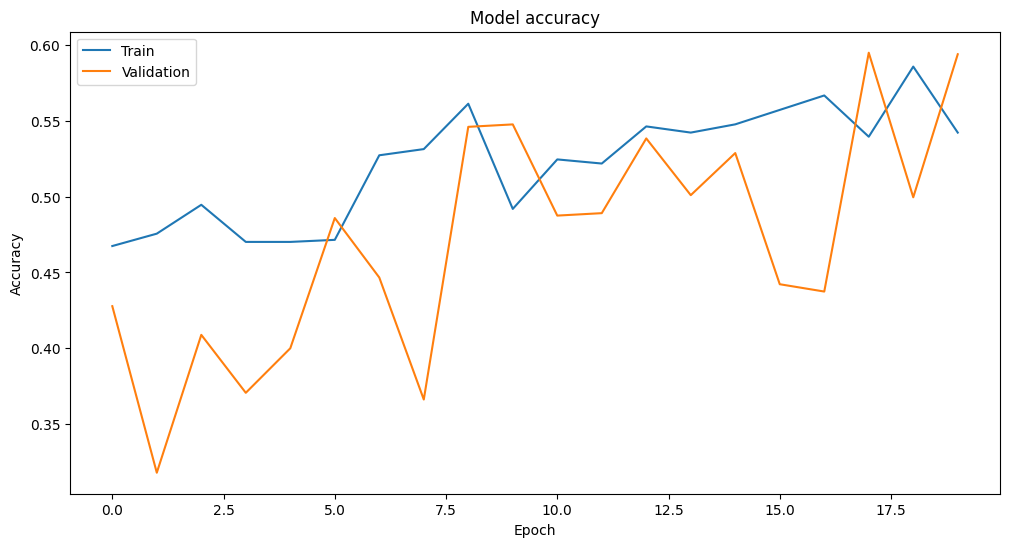

In [91]:
plot_epoch(history_rgb_2)

## **VGG16 Model**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

### **Model Building**


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

base_model.trainable = False

#finetuning model from block5_conv1 onward
for layer in base_model.layers[15:]:
    layer.trainable = True


vgg_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation='softmax')
])




### **Compiling and Training the VGG16 Model**

In [ ]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

vgg_model.summary()

history_vgg = vgg_model.fit(
    train_ds,
    validation_data = val_ds,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    callbacks=[early_stop]
)

### **Evaluating the VGG16 model**

In [ ]:

epoch_plot(history_vgg)

pred_vgg = model_vgg.predict(test_ds)
pred_vgg = [np.argmax(i) for i in pred_vgg]

y_true = np.concatenate([y for x, y in test_ds])
y_true = np.argmax(y_true, axis=1)

print(classification_report(y_true, pred_vgg))

## **ResNet V2 Model**

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D

tf.keras.backend.clear_session()

np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

### **Model Building**



In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
layer_name = 'conv5_block3_out'
desired_layer = base_model.get_layer(layer_name)

x = desired_layer.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

final_model = Model(inputs=base_model.input, outputs=predictions)

### **Compiling and Training the Model**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10)
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_final_model = final_model.fit(
    train_ds,
    validation_data = val_ds,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    callbacks=[early_stop]
)

### **Evaluating the ResNet Model**

In [ ]:
epoch_plot(history_final_model)

pred_res = final_model.predict(test_ds)
pred_ves = [np.argmax(i) for i in pred_res]

y_true = np.concatenate([y for x, y in test_ds])
y_true = np.argmax(y_true, axis=1)

print(classification_report(y_true, pred_res))

## **EfficientNet Model**

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
tf.keras.backend.clear_session()

np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

### **Model Building**



In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
layer_name = 'block7a_project_bn'
desired_layer = base_model.get_layer(layer_name)

x = desired_layer.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

final_model = Model(inputs=base_model.input, outputs=predictions)

### **Compiling and Training the Model**

In [ ]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_final_model = final_model.fit(
    train_ds,
    validation_data = val_ds,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    callbacks=[early_stop]
)

### **Evaluating the EfficientnetNet Model**

In [ ]:
epoch_plot(history_final_model)

pred_en = final_model.predict(test_ds)
pred_en = [np.argmax(i) for i in pred_en]

y_true = np.concatenate([y for x, y in test_ds])
y_true = np.argmax(y_true, axis=1)

print(classification_report(y_true, pred_en))


### **More Complex CNN**
```



In [83]:
def cnn_model():
    model = Sequential()

    model.add(tf.keras.layers.Rescaling(1./255))

    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(48, 48, 1)))
    model.add(LeakyReLU(alpha=0.1))

    for i in range(5):
      model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
      model.add(BatchNormalization())
      model.add(LeakyReLU(alpha=0.1))


    model.add(MaxPooling2D(pool_size=(2, 2)))


    for i in range(5):
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

cnn_model = cnn_model()



### **Compiling and Training the Model**

In [84]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10)

history_cnn_model = cnn_model.fit(
    train_ds,
    validation_data = val_ds,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
23/23 [==============================] - 3s 51ms/step - loss: 6.8871 - accuracy: 0.2948 - val_loss: 1.5212 - val_accuracy: 0.2443
Epoch 2/20
23/23 [==============================] - 1s 35ms/step - loss: 1.6187 - accuracy: 0.2853 - val_loss: 1.4287 - val_accuracy: 0.2443
Epoch 3/20
23/23 [==============================] - 1s 36ms/step - loss: 1.4438 - accuracy: 0.2649 - val_loss: 1.4622 - val_accuracy: 0.2443
Epoch 4/20
23/23 [==============================] - 1s 36ms/step - loss: 1.4291 - accuracy: 0.2867 - val_loss: 1.5032 - val_accuracy: 0.2443
Epoch 5/20
23/23 [==============================] - 1s 35ms/step - loss: 1.4394 - accuracy: 0.2690 - val_loss: 1.4053 - val_accuracy: 0.2289
Epoch 6/20
23/23 [==============================] - 1s 35ms/step - loss: 1.4381 - accuracy: 0.2459 - val_loss: 1.3541 - val_accuracy: 0.3667
Epoch 7/20
23/23 [==============================] - 1s 35ms/step - loss: 1.4110 - accuracy: 0.2758 - val_loss: 1.4402 - val_accuracy: 0.2289
Epoch 8/20
23

In [ ]:
epoch_plot(history_cnn_model)

pred_cnn = cnn_model.predict(test_ds)
pred_cnn = [np.argmax(i) for i in pred_cnn]

y_true = np.concatenate([y for x, y in test_ds])
y_true = np.argmax(y_true, axis=1)

print(classification_report(y_true, pred_cnn))

In [98]:
def test_model():
    model = Sequential()

    model.add(tf.keras.layers.Rescaling(1./255))

    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(48,48,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Flatten())


    model.add(Dense(64, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

    return model
test_model_1 = test_model()

In [99]:
history_test_model = test_model_1.fit(
    train_ds,
    validation_data = val_ds,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
23/23 [==============================] - 3s 27ms/step - loss: 1.3863 - accuracy: 0.2622 - val_loss: 1.4275 - val_accuracy: 0.2289
Epoch 2/20
23/23 [==============================] - 0s 20ms/step - loss: 1.3705 - accuracy: 0.2867 - val_loss: 1.3306 - val_accuracy: 0.2753
Epoch 3/20
23/23 [==============================] - 0s 19ms/step - loss: 1.3151 - accuracy: 0.3709 - val_loss: 1.3170 - val_accuracy: 0.3954
Epoch 4/20
23/23 [==============================] - 0s 19ms/step - loss: 1.2717 - accuracy: 0.4130 - val_loss: 1.2420 - val_accuracy: 0.4197
Epoch 5/20
23/23 [==============================] - 0s 19ms/step - loss: 1.2327 - accuracy: 0.4280 - val_loss: 1.2071 - val_accuracy: 0.4730
Epoch 6/20
23/23 [==============================] - 0s 19ms/step - loss: 1.1878 - accuracy: 0.4701 - val_loss: 1.2330 - val_accuracy: 0.4306
Epoch 7/20
23/23 [==============================] - 0s 19ms/step - loss: 1.1845 - accuracy: 0.4891 - val_loss: 1.1805 - val_accuracy: 0.5047
Epoch 8/20
23

### **Evaluating the Model on Test Set**

In [ ]:
epoch_plot(history_test_model)

pred_test = model_vgg.predict(test_ds)
pred_test = [np.argmax(i) for i in pred_test]

y_true = np.concatenate([y for x, y in test_ds])
y_true = np.argmax(y_true, axis=1)

print(classification_report(y_true, pred_test))



### **Plotting the Confusion Matrix for the chosen final model**

In [ ]:
sns.set_style("dark")

plt.figure(figsize = (15, 8))

plt.title("Confusion Matrix - Model 2")

cm = confusion_matrix(y_true, pred_test)

sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)

plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

plt.show()